In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
missing = df.isnull().sum()
print("missing values: \n",missing[missing>0])

missing values: 
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [5]:
df=df.drop('Alley',axis=1)

In [6]:
df=df.drop('Utilities',axis=1)

In [7]:
numerical_features=df.select_dtypes(include=['int64','float64']).columns

In [8]:
df[numerical_features]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [35]:
usecolumns=['Id','MSSubClass','MSZoning','LotArea','LotConfig','BldgType','OverallCond','YearBuilt','YearRemodAdd','Exterior1st','BsmtFinSF2','TotalBsmtSF','SalePrice']

In [25]:
final_df = pd.read_csv('dataset.csv',usecols = usecolumns)

final_df.sample(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
621,622,60,RL,10800,Inside,1Fam,7,1974,1997,HdBoard,182,1522,240000
1222,1223,50,RL,10496,Inside,1Fam,6,1949,1950,Wd Sdng,0,1040,143000
650,651,60,FV,8125,Inside,1Fam,6,2007,2007,CemntBd,0,813,205950
301,302,60,RL,16226,Inside,1Fam,5,1998,1999,VinylSd,0,1028,267000
661,662,60,RL,46589,CulDSac,1Fam,7,1994,2005,VinylSd,180,1629,402000


In [20]:
numerical_features=df.select_dtypes(include=['int64','float64']).columns

In [28]:
import seaborn as sns
numerical_dataset = final_df.select_dtypes(include=['number'])

<Axes: >

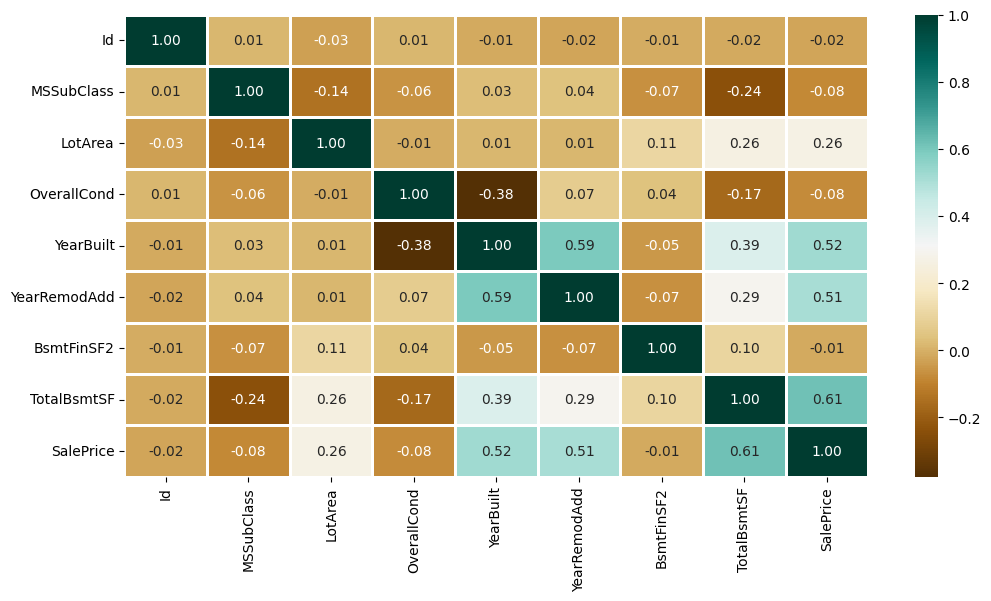

In [29]:
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

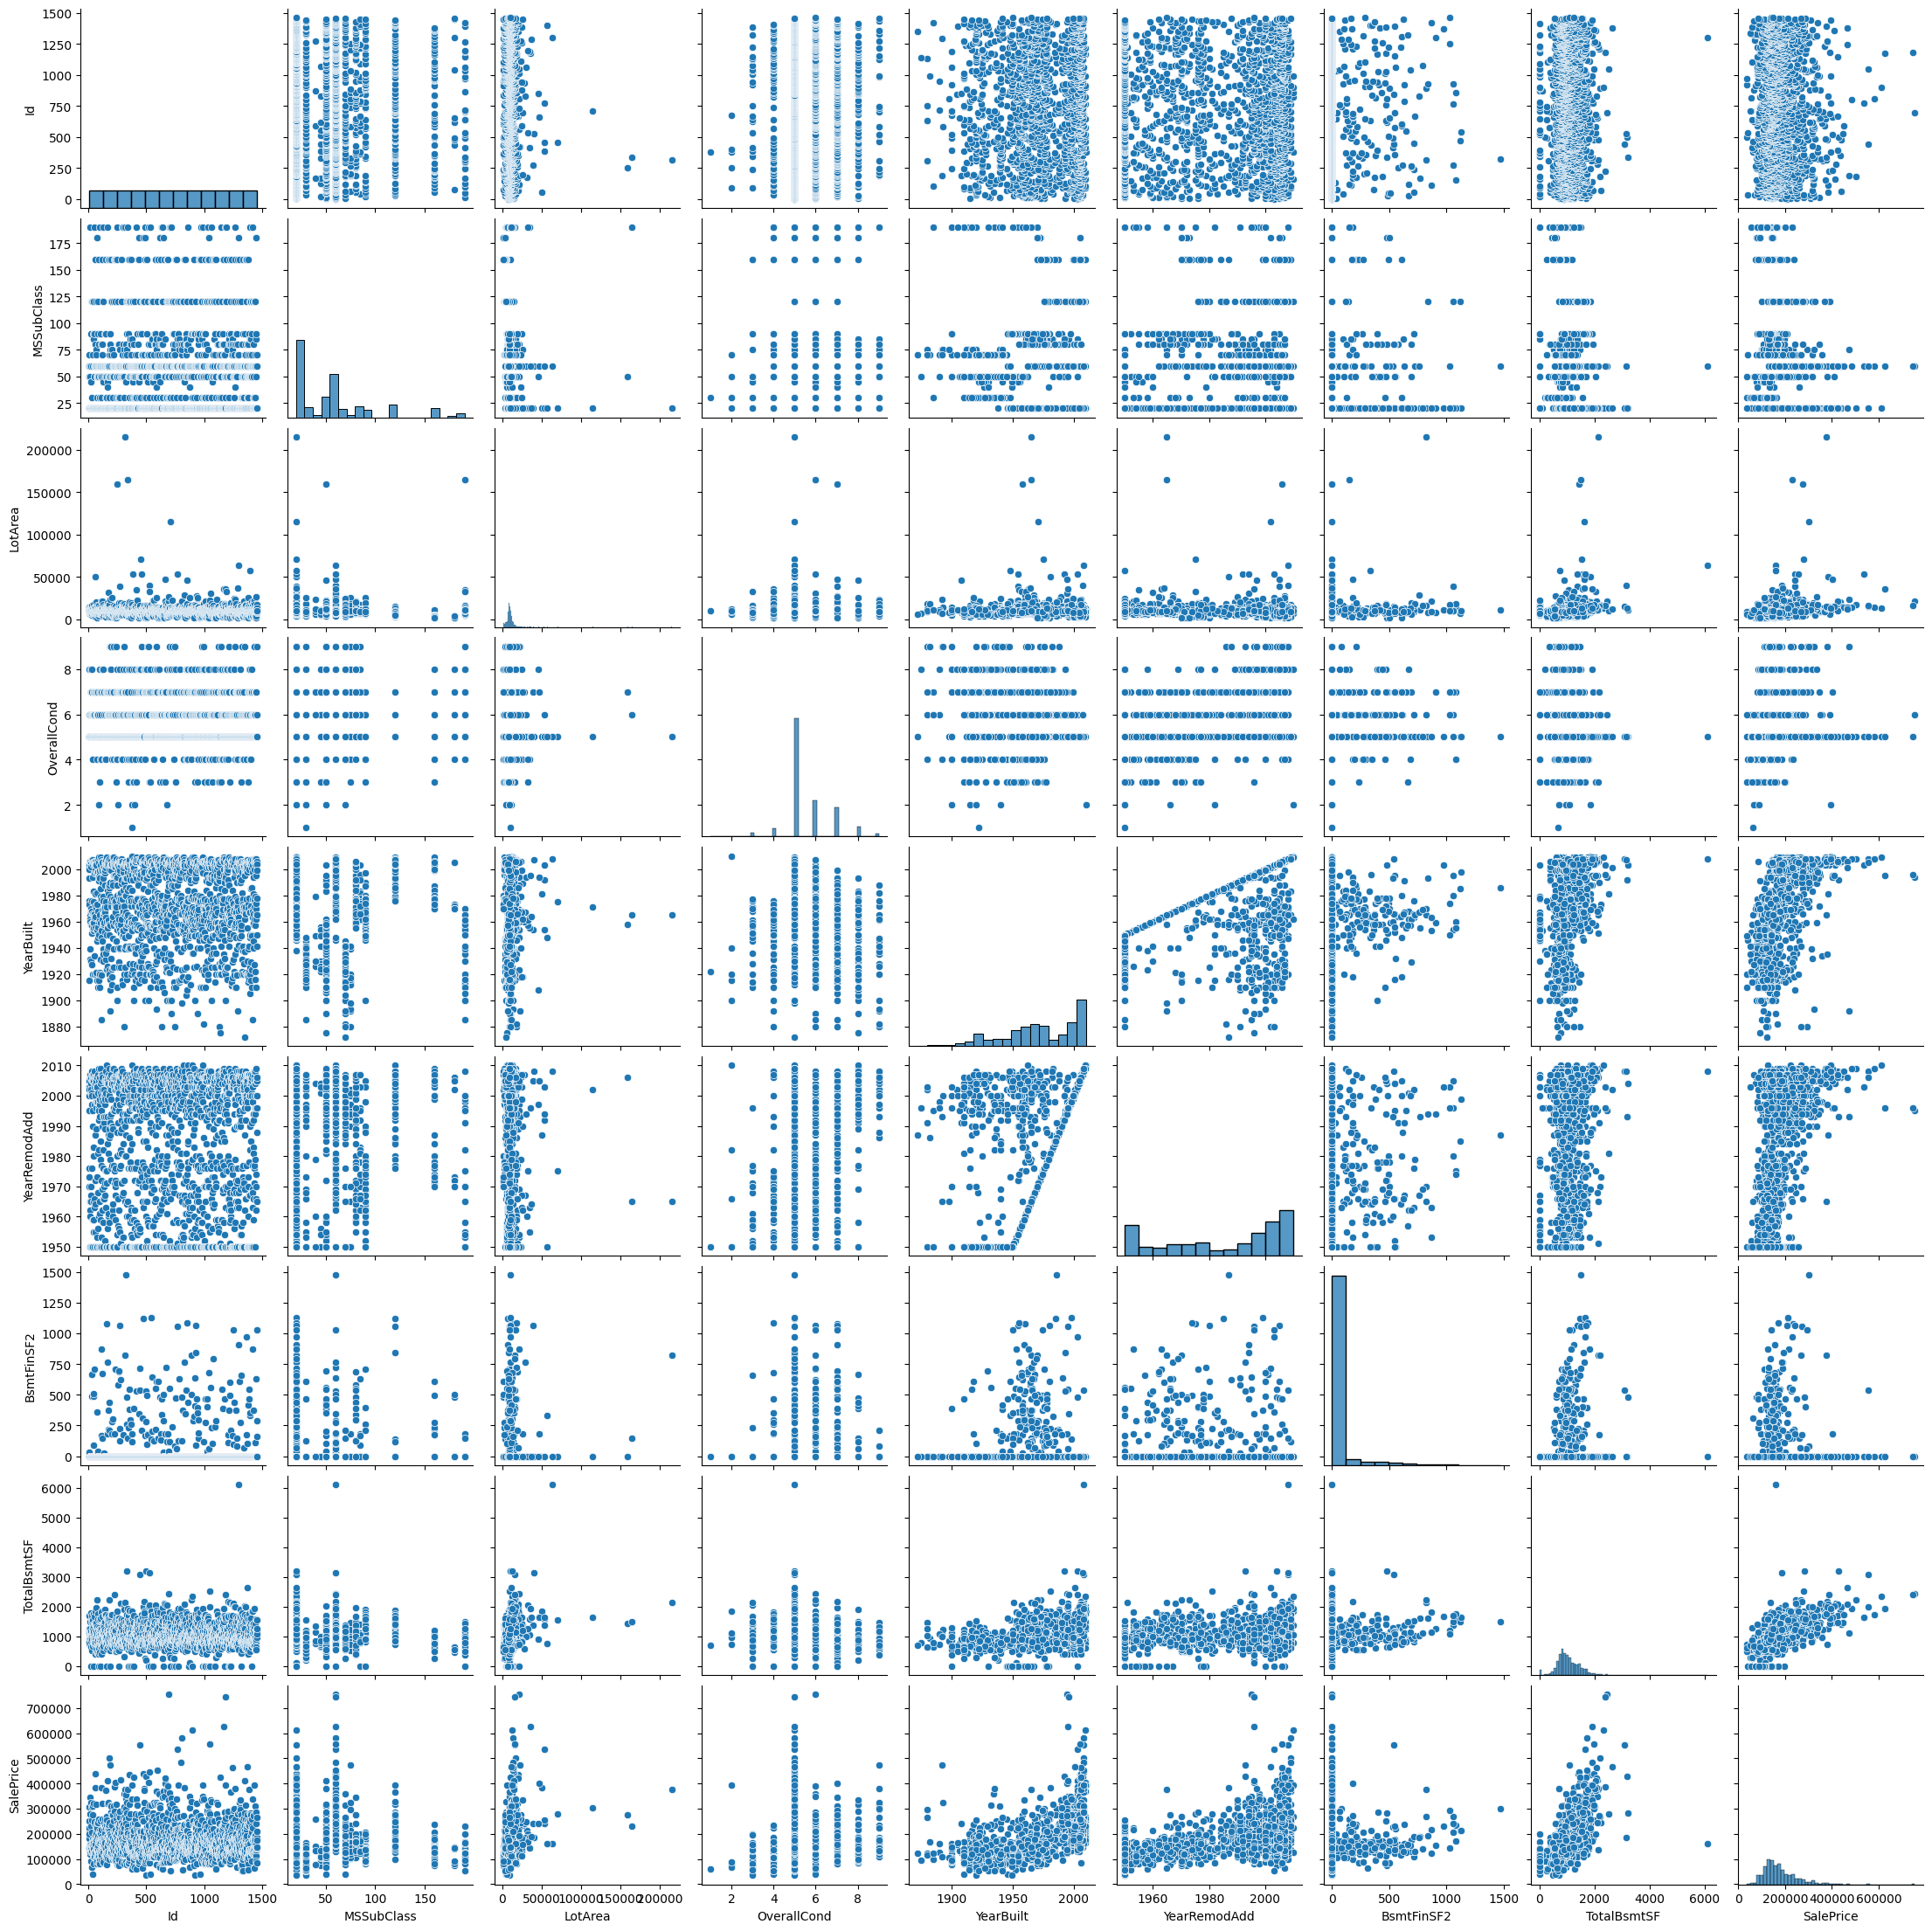

In [30]:
sns.pairplot(final_df)

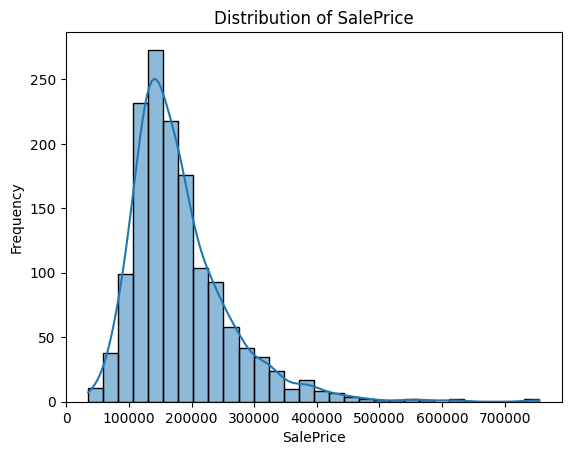

In [42]:
sns.histplot(final_df['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

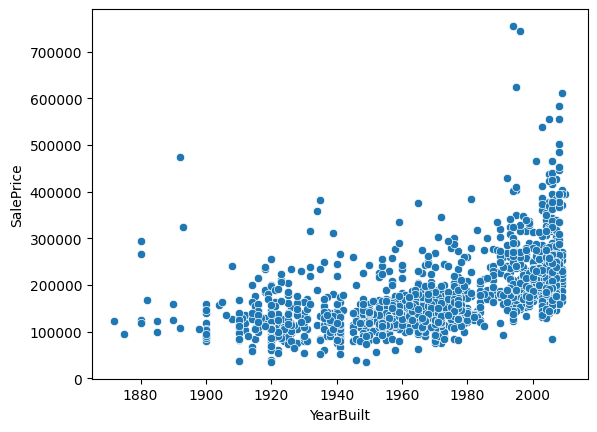

In [32]:
sns.scatterplot(x='YearBuilt',y='SalePrice',data=final_df)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

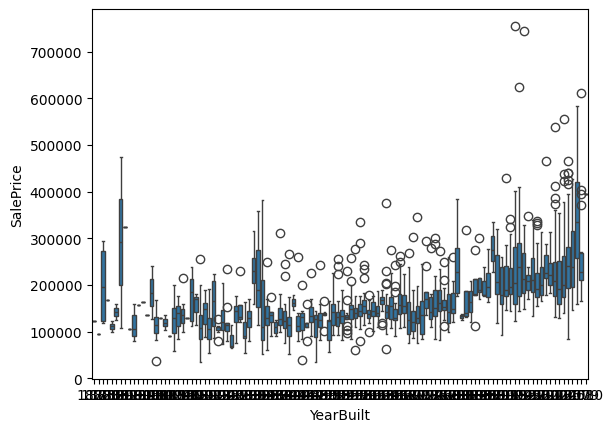

In [34]:
sns.boxplot(x='YearBuilt',y='SalePrice',data=final_df)

In [ ]:
sns.boxplot(x='YearBuilt',y='SalePrice',data=final_df)

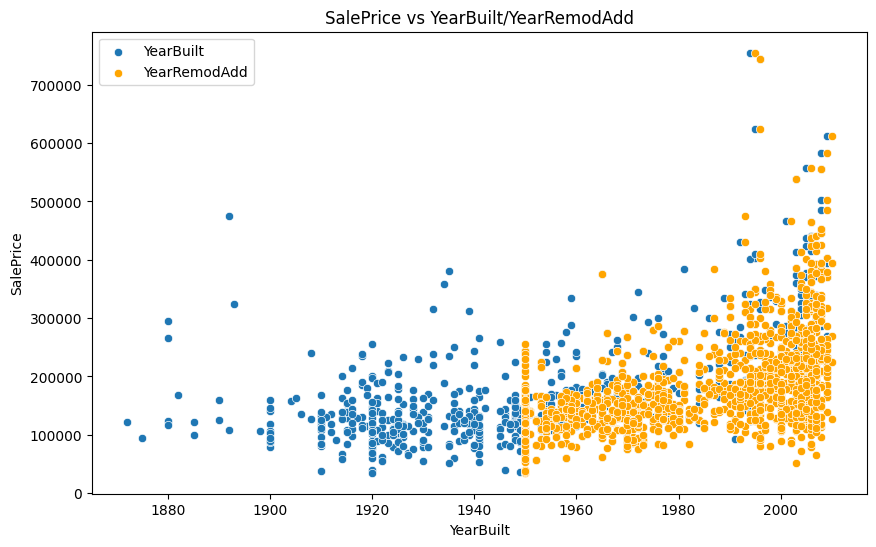

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_df['YearBuilt'], y=final_df['SalePrice'], label='YearBuilt')
sns.scatterplot(x=final_df['YearRemodAdd'], y=final_df['SalePrice'], label='YearRemodAdd', color='orange')
plt.title("SalePrice vs YearBuilt/YearRemodAdd")
plt.legend()
plt.show()


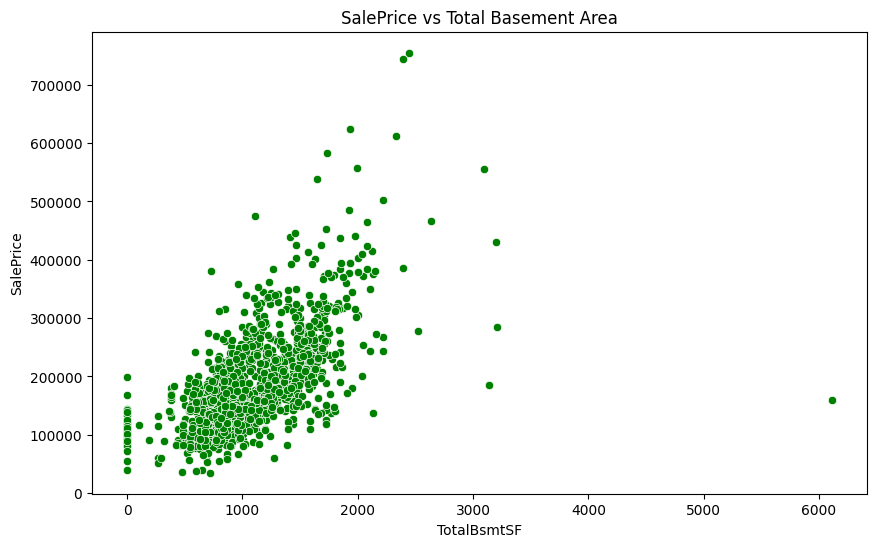

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_df['TotalBsmtSF'], y=final_df['SalePrice'], color='green')
plt.title("SalePrice vs Total Basement Area")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

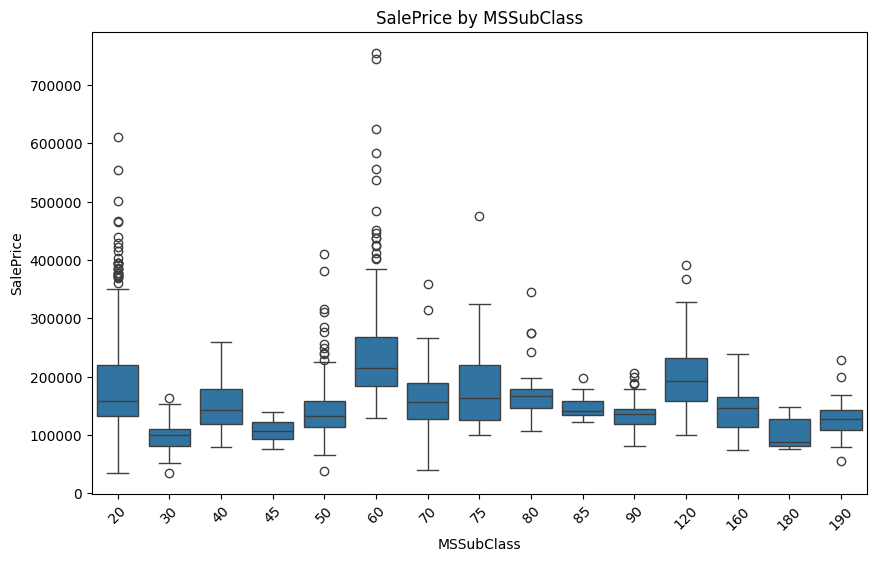

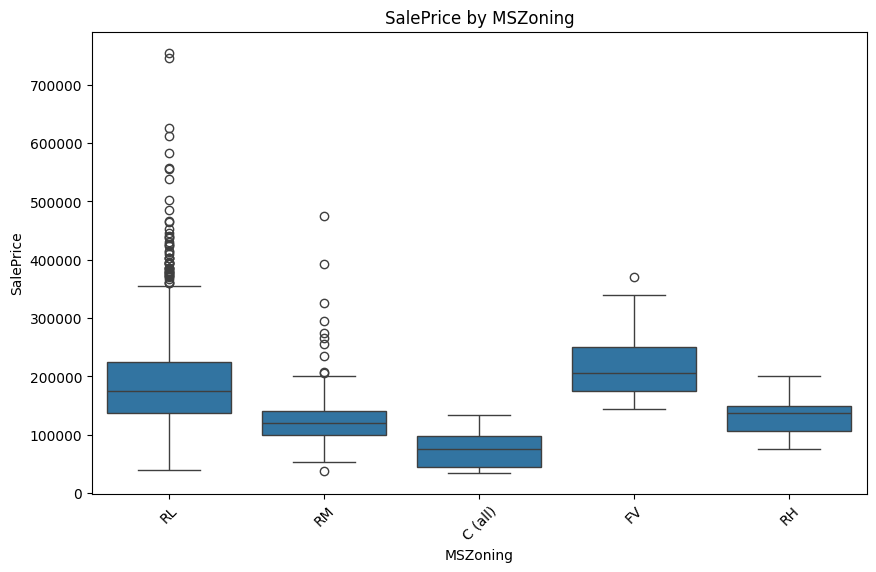

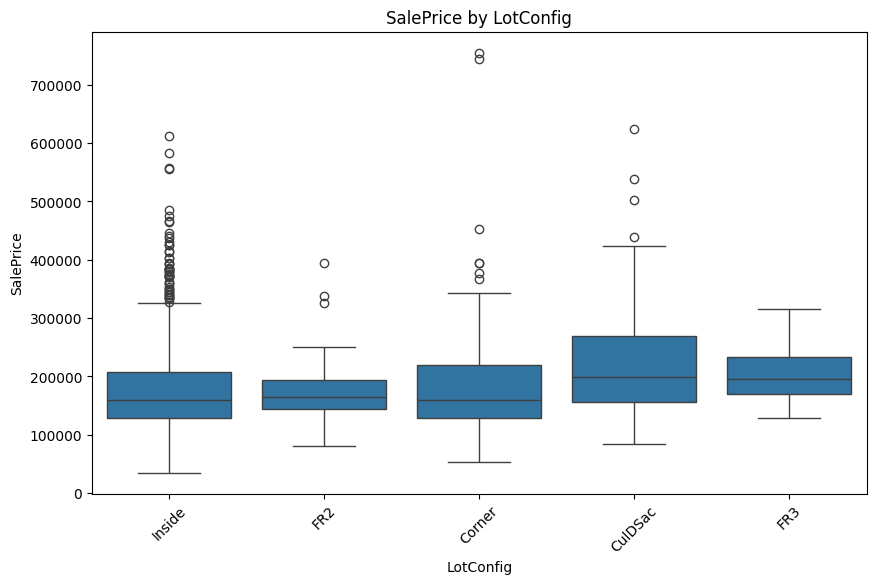

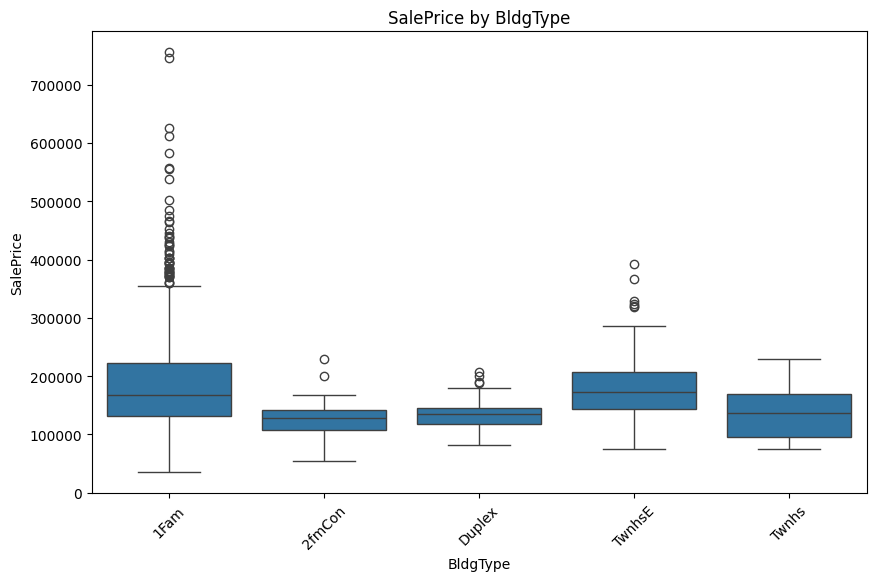

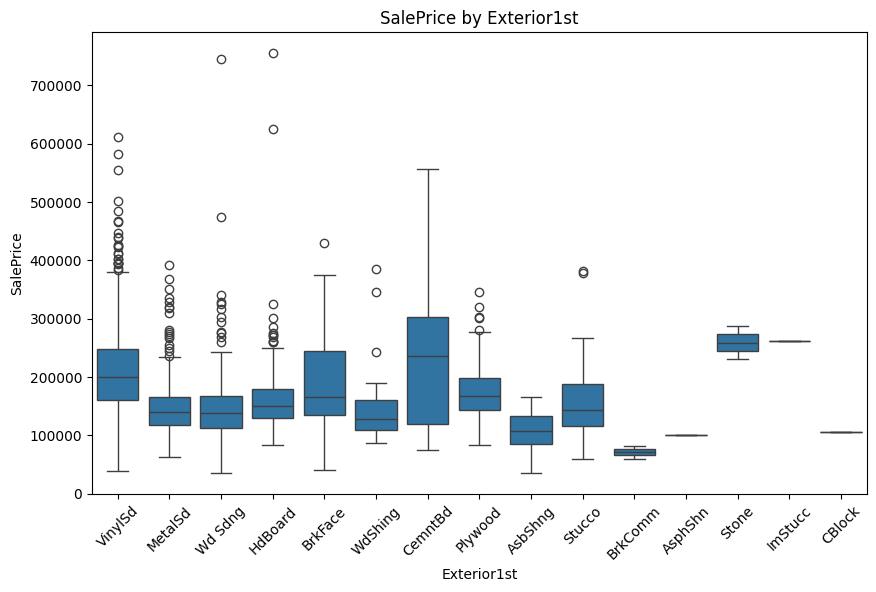

In [39]:
categorical_cols = ['MSSubClass', 'MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=final_df[col], y=final_df['SalePrice'])
    plt.title(f"SalePrice by {col}")
    plt.xticks(rotation=45)
    plt.show()

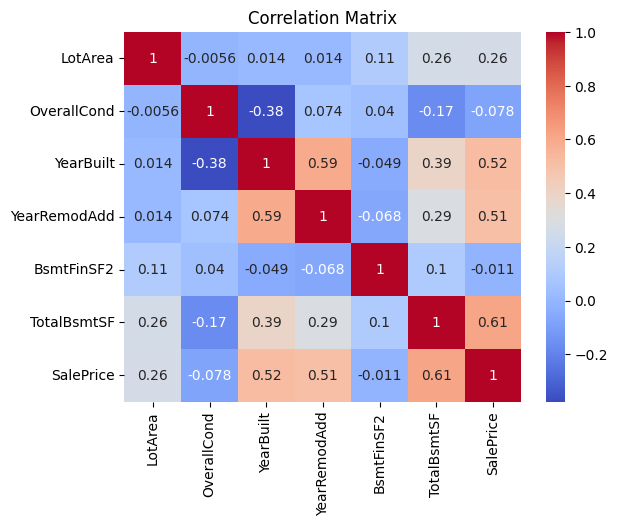

In [40]:
numerical_cols = ['LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']
correlation_matrix = final_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()